<a href="https://colab.research.google.com/github/muffin-head/Cancer-caseStudy/blob/main/Cancer%20Case%20study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [ ]:
import pandas as pd
text_data= pd.read_csv('/content/drive/MyDrive/data cancer/training_text/training_text',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
text_data.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


# Preprocessing

In [ ]:
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
stop_word= set(stopwords.words('english'))
def preprocessing(text,index,col):
  if type(text) is not int:
    text_string=""
    text = re.sub('[^a-zA-Z0-9\n]',' ',text)
    text=re.sub('\s+',' ',text)
    text=text.lower()
    for word in text.split():
      if not word in stop_word:
        text_string+=word+" "
    text_data[col][index]=text_string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

for index, row in text_data.iterrows():
  print(row)
  if type(row['TEXT']) is str:
    preprocessing(row['TEXT'],index,'TEXT')

<ipython-input-9-b4091df54337>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data[col][index]=text_string


In [ ]:
text_data.head()

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [ ]:
variants_data=pd.read_csv('/content/drive/MyDrive/data cancer/training_variants/training_variants')

In [ ]:
variants_data.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [ ]:
data=pd.merge(text_data,variants_data,on='ID',how='left')
data.head()

,ID,TEXT,Gene,Variation,Class
0,0,cyclin dependent kinases cdks regulate variety...,FAM58A,Truncating Mutations,1
1,1,abstract background non small cell lung cancer...,CBL,W802*,2
2,2,abstract background non small cell lung cancer...,CBL,Q249E,2
3,3,recent evidence demonstrated acquired uniparen...,CBL,N454D,3
4,4,oncogenic mutations monomeric casitas b lineag...,CBL,L399V,4


In [ ]:
y_actual=data['Class'].values
data.Gene=data.Gene.replace('\s+','_')
data.Variation=data.Variation.replace('\s+','_')


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,y_actual,stratify=y_actual,test_size=0.2)
train_df,train_cv,y_train,y_cv=train_test_split(X_train,Y_train,stratify=)

# Check the distribution


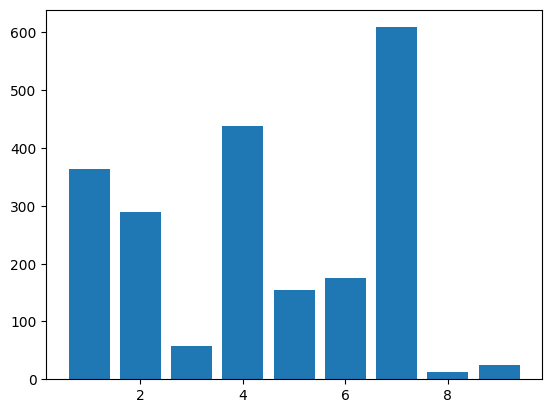

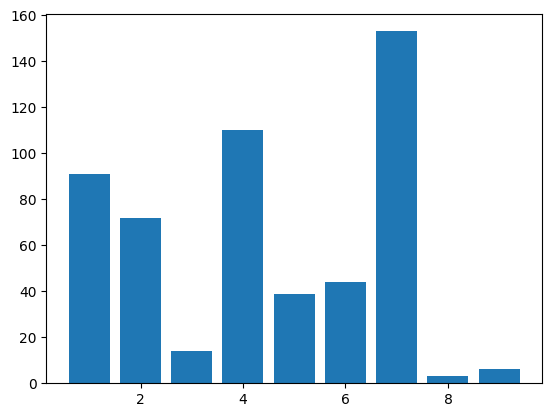

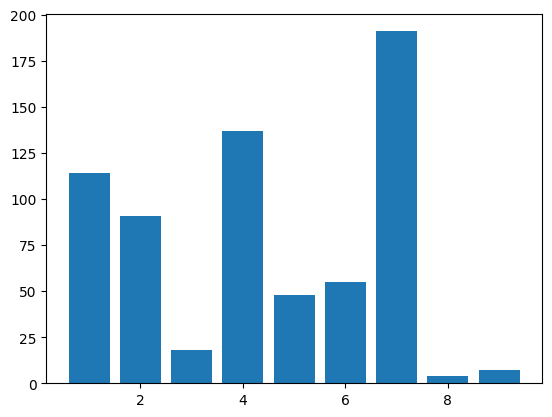

In [ ]:
import matplotlib.pyplot as plt
counts=train_df['Class'].value_counts()
counts_cv=train_cv['Class'].value_counts()
counts_test=X_test['Class'].value_counts()

plt.bar(counts.index,counts.values)
plt.show()
plt.bar(counts_cv.index,counts_cv.values)
plt.show()
plt.bar(counts_test.index,counts_test.values)

plt.show()

# Build the random model

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def cm(test_y,test_pred):
  cm=confusion_matrix(test_y,test_pred)
  disp=ConfusionMatrixDisplay(cm,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()
  A=((cm.T)/((cm.sum(axis=1)).T))
  B=(cm/cm.sum(axis=0))
  disp=ConfusionMatrixDisplay(A,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()
  disp=ConfusionMatrixDisplay(B,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()

In [ ]:
import numpy as np
np.random.rand(1,9)/np.sum(np.random.rand(1,9)[0])

array([[0.20042681, 0.13588977, 0.06713815, 0.11387172, 0.01148413,
        0.11954899, 0.09883041, 0.08081113, 0.1434553 ]])

In [ ]:
from sklearn.metrics import log_loss
test_data_len=X_test.shape[0]
cv_data_len=train_cv.shape[0]
cv_prd=np.zeros((cv_data_len,9))
for i in range(cv_data_len):
  prob=np.random.rand(1,9)
  cv_prd[i]=((prob/(np.sum(prob)))[0])
print("Random model logloss for validatio set is "),+ log_loss(y_cv,cv_prd,eps=1e-15)

Random model logloss for validatio set is 


(None, 2.4799833220240908)

In [ ]:

test_prd=np.zeros((test_data_len,9))
for i in range(test_data_len):
  prob_test=np.random.rand(1,9)
  test_prd[i]=((prob_test/(np.sum(prob_test)))[0])
print("Random model logloss for validatio set is "),+ log_loss(Y_test,test_prd,eps=1e-15)

Random model logloss for validatio set is 


(None, 2.532396933953635)

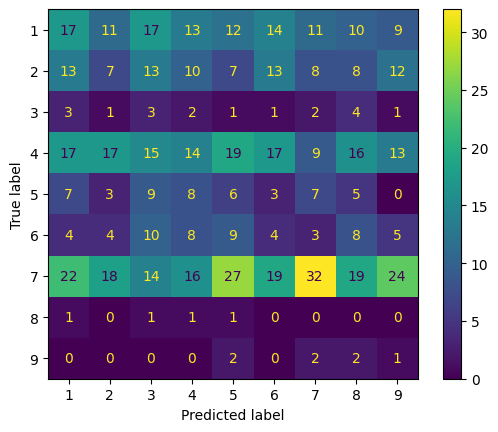

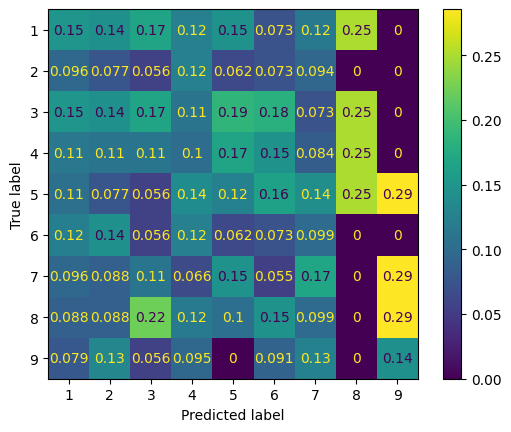

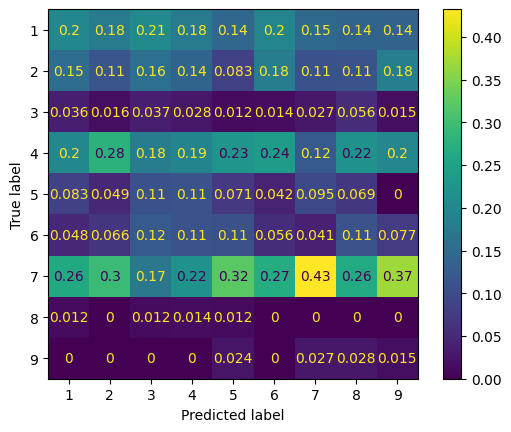

In [ ]:
y_predicted=np.argmax(test_prd,axis=1)
cm(Y_test,y_predicted+1)

# Univar analysis

In [ ]:
gene_feat= train_df['Gene'].value_counts()
print('gene total no.=',gene_feat.shape[0])
print('count of each of it is =')
gene_feat.head(10)

gene total no.= 230
count of each of it is =


BRCA1     175
TP53      109
EGFR       93
PTEN       82
BRCA2      82
BRAF       62
KIT        57
ERBB2      50
ALK        44
PDGFRA     41
Name: Gene, dtype: int64

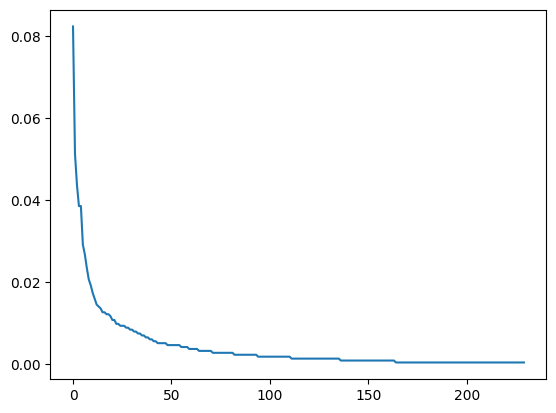

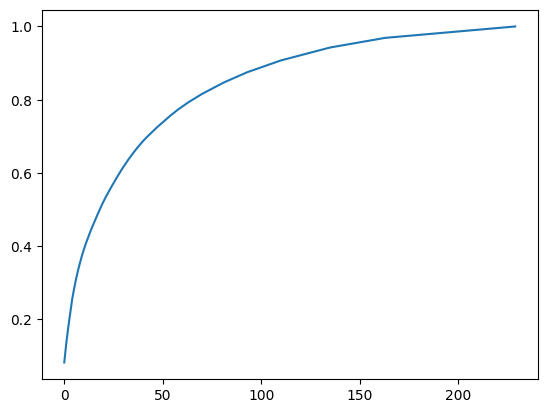

In [ ]:
s=sum(gene_feat.values)
h=gene_feat.values/s
plt.plot(h)
plt.show()
c=np.cumsum(h)
plt.plot(c)
plt.show()

In [ ]:
sum(gene_feat.values)

2124